# Exercise Sheet 5

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist  # MNIST data
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.losses import categorical_crossentropy #loss function
from tensorflow.keras.optimizers import Adam, SGD #optimisers

## [2] Network Analysis

The aim of this exercise is to familiarise yourself with analysing tools for trained neural networks, i.e. opening the black box. In Keras you can access the value of the weights using get weights(). Here we analyse the network we have discussed in the lectures, you can find a link to the pre-trained weights on the course website.  
* In a first step, identify examples where the network is not yet performing well, i.e. which are incorrectly classified.
* In a second step, visualise the average activation of several hidden layers and in particular different hidden filters in the convolutional layers. Try to identify the role of some of the hidden filters. It might be useful to consider the activations for a particular class of the dataset.

### Solution

Have a look at what Google does!  
[DeepDream Blog Post](https://ai.googleblog.com/2015/06/inceptionism-going-deeper-into-neural.html)  
[DeepDream Github](https://github.com/google/deepdream/blob/master/dream.ipynb)  
Also have a look at this [link](https://towardsdatascience.com/how-to-visualize-convolutional-features-in-40-lines-of-code-70b7d87b0030) for maximizing activation of feature maps

In [3]:
# import CIFAR dataset
from tensorflow.keras.datasets import cifar10

In [4]:
# Load model from downloaded file
model2 = tf.keras.models.load_model('keras_cifar10_trained_model.h5')
model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_12 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_13 (Activation)   (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 15, 15, 64)       

In [5]:
# Data preprocessing

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

n_classes = 10

y_train = tf.keras.utils.to_categorical(y_train, n_classes)
y_test = tf.keras.utils.to_categorical(y_test, n_classes)

In [6]:
# take only a few
predictions = model2.predict_classes(x_test[:100])
correct_classes = np.argwhere(y_test==1)[:100,1]

wrong_pred = x_test[:100][predictions != correct_classes]
wrong_pred_predicted_classes = predictions[predictions != correct_classes]
wrong_pred_correct_classes = correct_classes[predictions != correct_classes]
wrong_pred.shape

(56, 32, 32, 3)

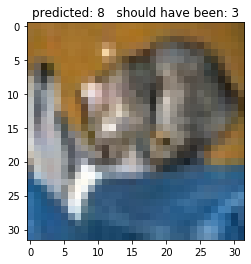

In [7]:
# Plot one example:

examplenum = 0

plt.imshow(wrong_pred[examplenum], interpolation='nearest')
plt.title("predicted: " + str(wrong_pred_predicted_classes[examplenum]) + "   " + "should have been: " + str(wrong_pred_correct_classes[0]));

In [8]:
# Extract the layer outputs of model2
layer_outputs = [layer.output for layer in model2.layers] 

# Create model that spits out the outputs of model2
model_out = tf.keras.models.Model(inputs=model2.input, outputs=layer_outputs) 

In [9]:
# Evaluate on the wrong predictions
activations = model_out.predict(wrong_pred[examplenum].reshape(-1,32,32,3))

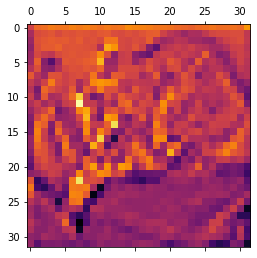

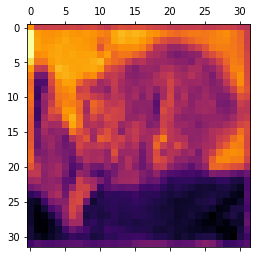

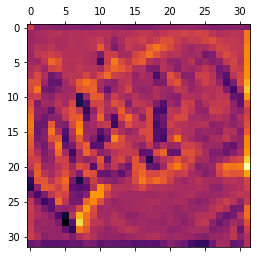

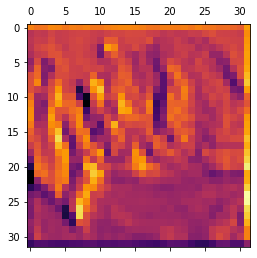

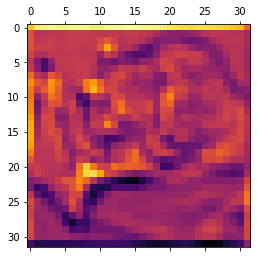

In [10]:
first_layer_activation = activations[0]
# have a look at different feature maps
plt.matshow(first_layer_activation[0, :, :, 0], cmap='inferno')
plt.matshow(first_layer_activation[0, :, :, 1], cmap='inferno')
plt.matshow(first_layer_activation[0, :, :, 2], cmap='inferno')
plt.matshow(first_layer_activation[0, :, :, 3], cmap='inferno')
plt.matshow(first_layer_activation[0, :, :, 4], cmap='inferno')

In [11]:
# plot all layer activations in the convolutional part of the net
def plot_layers(examplenum = 0):
    activations = model_out.predict(wrong_pred[examplenum].reshape(-1,32,32,3))

    layer_names = []
    for layer in model2.layers:
        # Get layer names for plot titles
        layer_names.append(layer.name)

    images_per_row = 16
    
# The code below looks complicated, but its just about the presentation and plotting.
# You might as well ignore it.
# The essence of how we extract the activations was already shown above.
    
    for layer_name, layer_activation in zip(layer_names, activations):
        if len(layer_activation.shape) == 4:     # ignore dense layers
            # number of feature maps
            n_features = layer_activation.shape[-1]
            # layer_activation.shape -> (1, size, size, n_features)
            size = layer_activation.shape[1]
            # arange in grid
            n_cols = n_features // images_per_row
            display_grid = np.zeros((size * n_cols, images_per_row * size))
            for col in range(n_cols):
                for row in range(images_per_row):
                    channel_image = layer_activation[0,:,:, col * images_per_row + row]
                    # post processing
                    channel_image -= channel_image.mean()
                    channel_image /= channel_image.std()
                    channel_image *= 64
                    channel_image += 128
                    channel_image = np.clip(channel_image, 0, 255).astype('uint8')
                    # place into grid
                    display_grid[col*size:(col+1)*size, row*size:(row+1)*size] = channel_image
            scale = 1. / size
            plt.figure(figsize=(scale*display_grid.shape[1], scale*display_grid.shape[0]))
            plt.title(layer_name)
            plt.grid(False)
            plt.imshow(display_grid, aspect='auto', cmap='inferno')

C:\Users\Sophie\Anaconda3\envs\ml37\lib\site-packages\ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in true_divide


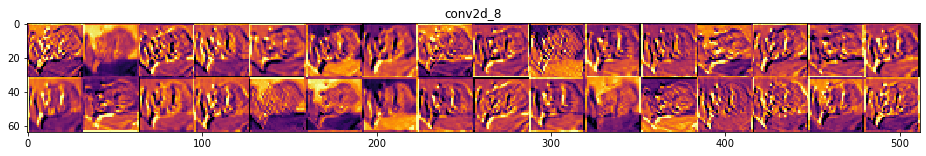

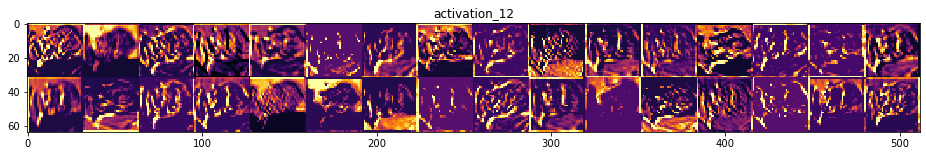

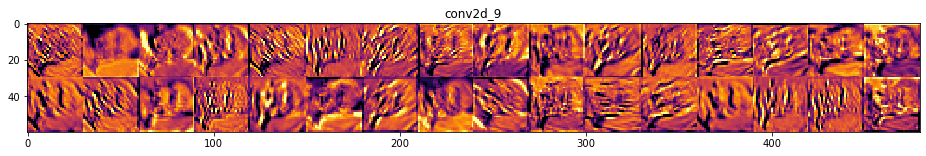

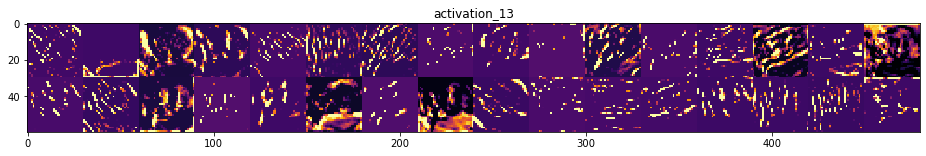

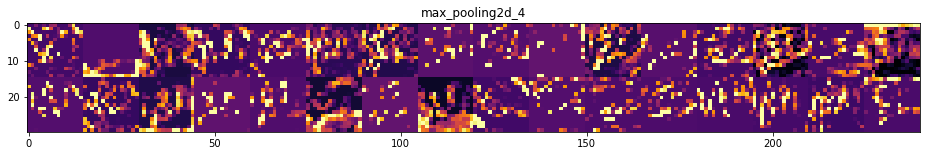

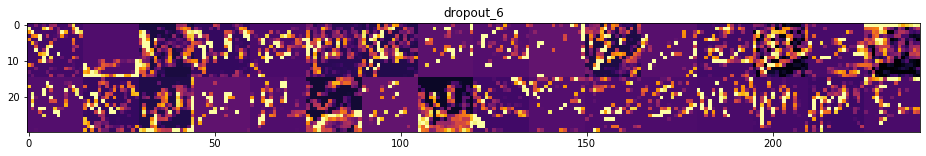

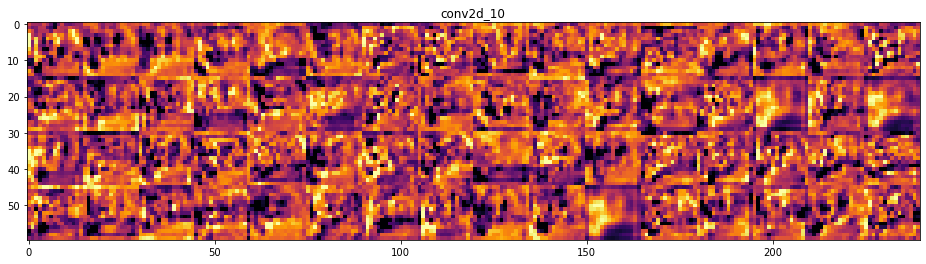

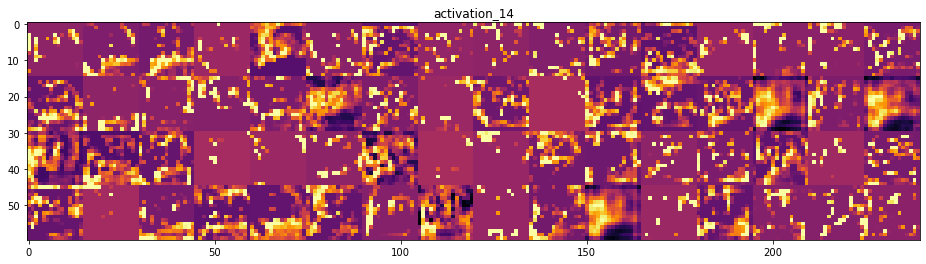

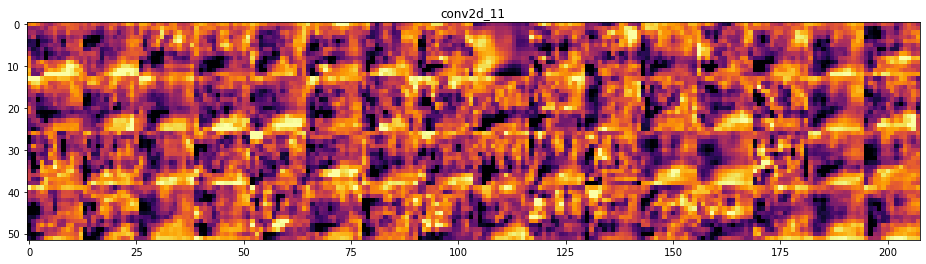

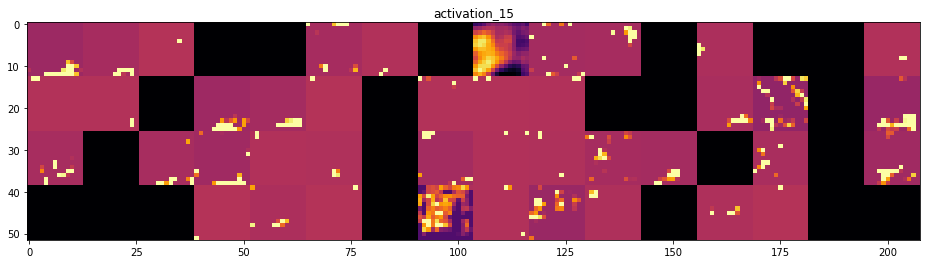

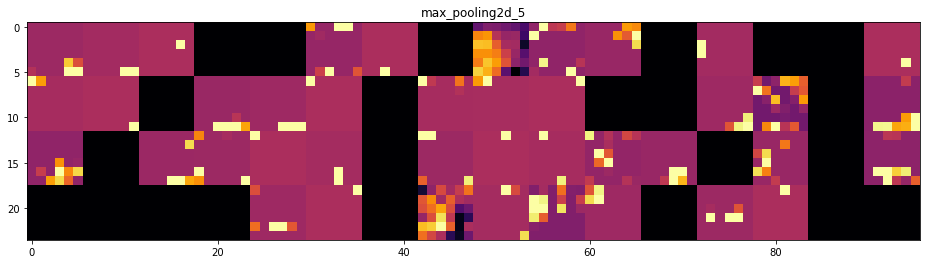

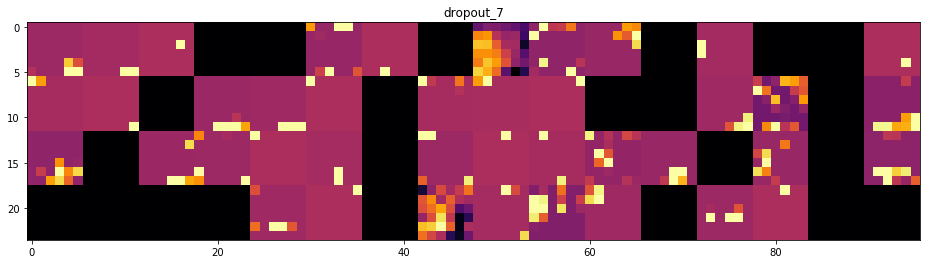

In [12]:
plot_layers(0)

C:\Users\Sophie\Anaconda3\envs\ml37\lib\site-packages\ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in true_divide


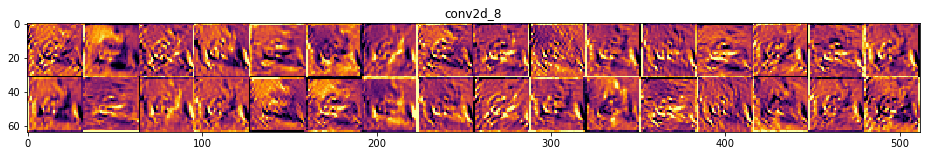

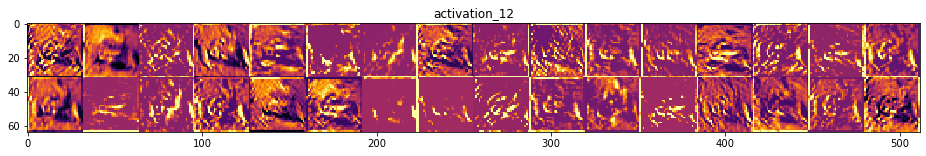

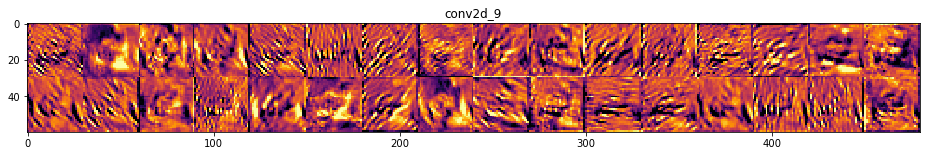

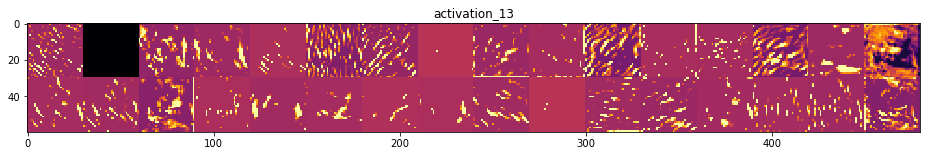

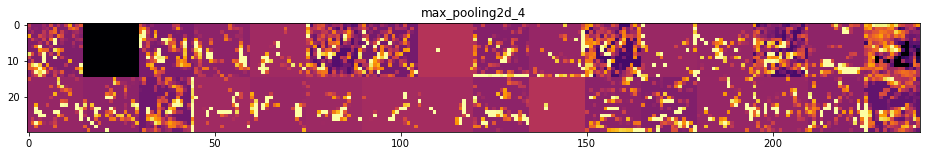

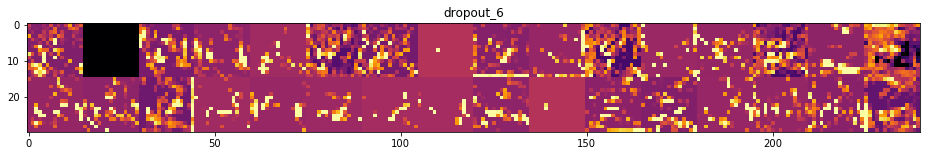

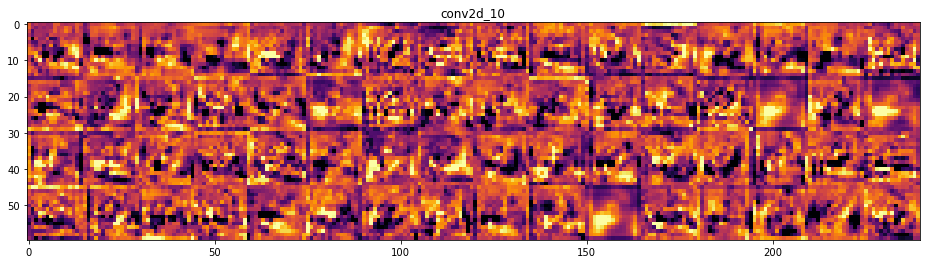

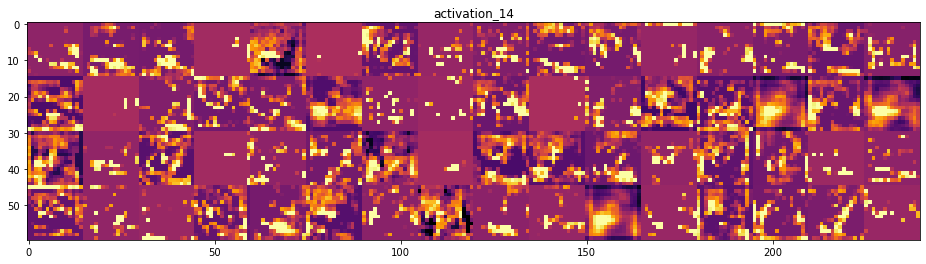

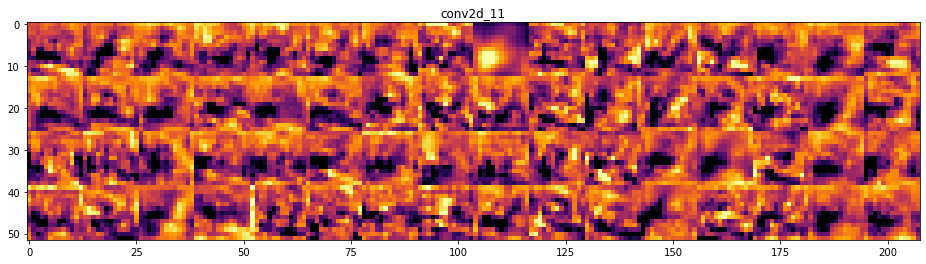

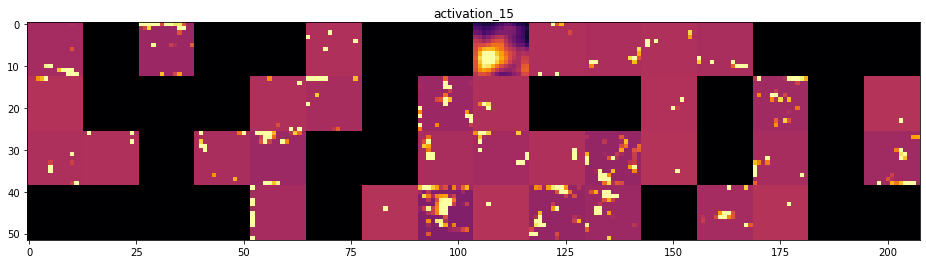

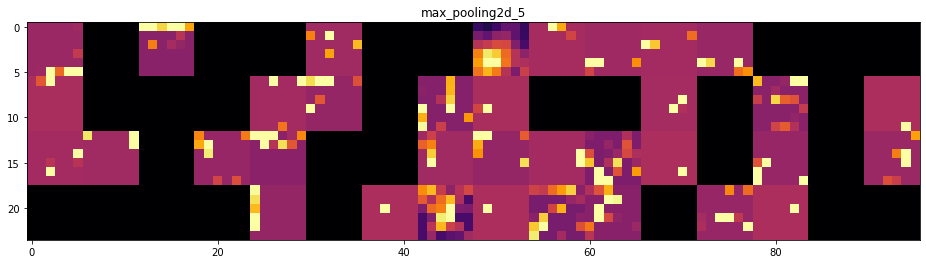

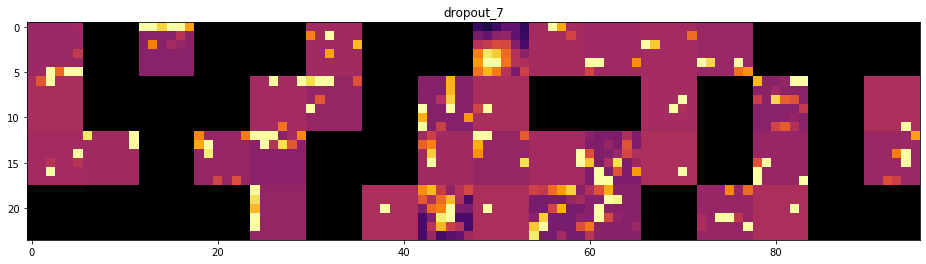

In [13]:
plot_layers(3)